# Footprint analysis of an industrial
This is the technical details, step by step, on how to analyze the CO2 emission of any entity regarding its electricity consumption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generating a consumption curve

An industrial could take his own consumption and reproduce the same logic. An energy supplier could do the same for his clients.

The values are random, but it reproduces the curve shape of a real consumption curve.

In [2]:
# We want to generate a time serie with 10 minutes frequency from 00:00AM to 23:50PM the same day
periods = 24 * 6 # 6 periods of 10 minutes for 24 hours
dates = pd.date_range('2019-12-02', periods=periods, freq='10T')

# You can use this seed to reproduce the same data
np.random.seed([42])
# I break the consumption data serie to make it more realistic
consumption_data_1 = pd.Series(np.random.randn(int(periods/3)) + 16)
consumption_data_2 = pd.Series(np.random.randn(int(periods/3)) + 18)
consumption_data_3 = pd.Series(np.random.randn(int(periods/3)) + 16)

consumption_data = pd.concat([consumption_data_1, consumption_data_2, consumption_data_3])

col_name_consumption = 'consumption (kWh)'
data = {'date': dates, col_name_consumption: consumption_data}

df_comsumption = pd.DataFrame(data)


## Displaying the dataframe

In [3]:
df_comsumption

,date,consumption (kWh)
0,2019-12-02 00:00:00,15.808194
1,2019-12-02 00:10:00,16.056302
2,2019-12-02 00:20:00,15.098023
3,2019-12-02 00:30:00,15.266885
4,2019-12-02 00:40:00,16.869048
5,2019-12-02 00:50:00,17.163019
6,2019-12-02 01:00:00,15.568444
7,2019-12-02 01:10:00,15.928339
8,2019-12-02 01:20:00,16.028855
9,2019-12-02 01:30:00,14.483983


## Ploting the data

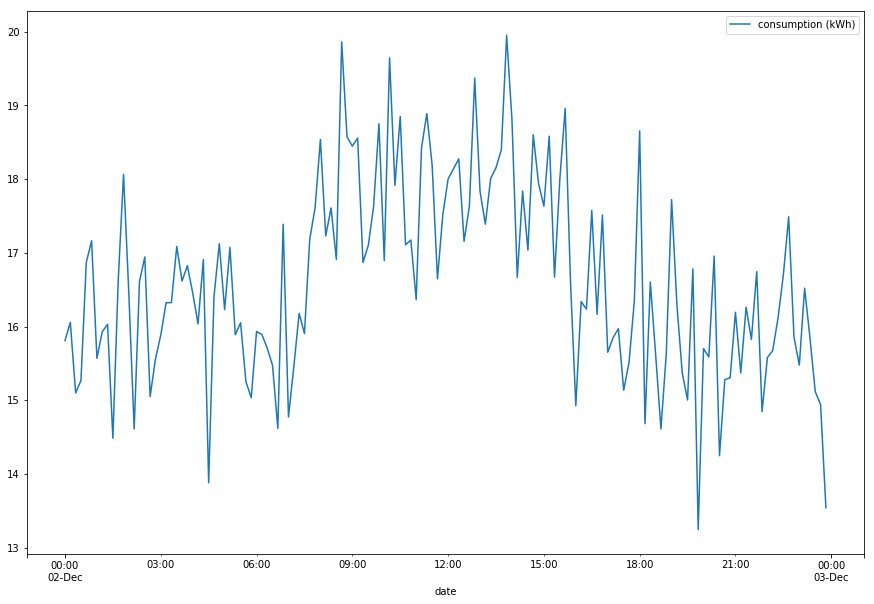

In [4]:
ax = df_comsumption.plot(x='date', y="consumption (kWh)", legend=True, figsize=(15, 10))

In [5]:
df_comsumption = df_comsumption.set_index('date')
df_comsumption

,consumption (kWh)
date,
2019-12-02 00:00:00,15.808194
2019-12-02 00:10:00,16.056302
2019-12-02 00:20:00,15.098023
2019-12-02 00:30:00,15.266885
2019-12-02 00:40:00,16.869048
2019-12-02 00:50:00,17.163019
2019-12-02 01:00:00,15.568444
2019-12-02 01:10:00,15.928339
2019-12-02 01:20:00,16.028855


# CO2 consumption

I created a csv file I fulfilled from various sources.

In [6]:
df_co2 = pd.read_csv('carbon_by_source.csv', sep=';')
df_co2.sort_values(by='Estimate (gCO2e/KWh)')

,Source,Estimate (gCO2e/KWh)
5,Nuclear,4
2,Wind offshore,9
1,Hydropower,10
3,Wind onshore,10
9,Hydro pumped storage,13
0,Biomass,25
4,Photovoltaics,56
8,Fossil gas,443
6,Fossil brown coal,1005
7,Fossil hard coal,1005


# Repartition of energy production in Germany
Source: SMARD
I downloaded a csv on December, 2019 period to get the data. We have a column by energy source. The unit is ??? MWh, GWh ???

In [19]:
df_prod = pd.read_csv('Actual_generation_201911260000_201912062359.csv', sep=';')
#display(df_prod)
df_prod.drop(columns=['Other conventional', 'Other renewable'], inplace=True)
df_prod['Date'] = pd.to_datetime(df_prod['Date'], format='%Y-%m-%dT%H:%M:%S')
df_prod = df_prod.set_index('Date')
df_prod['Total production'] = sum([df_prod[col] for col in df_prod.columns])
df_prod = df_prod.resample('10T').interpolate()
df_prod

,Biomass,Hydropower,Wind offshore,Wind onshore,Photovoltaics,Nuclear,Fossil brown coal,Fossil hard coal,Fossil gas,Hydro pumped storage,Total production
Date,,,,,,,,,,,
2019-12-01 00:00:00,1201.000000,372.000000,72.000000,1586.000000,0.0,2307.000000,3800.000000,1607.000000,1349.000000,267.000000,12561.000000
2019-12-01 00:10:00,1199.333333,368.333333,75.333333,1589.666667,0.0,2306.000000,3791.000000,1572.666667,1359.666667,200.333333,12462.333333
2019-12-01 00:20:00,1197.666667,364.666667,78.666667,1593.333333,0.0,2305.000000,3782.000000,1538.333333,1370.333333,133.666667,12363.666667
2019-12-01 00:30:00,1196.000000,361.000000,82.000000,1597.000000,0.0,2304.000000,3773.000000,1504.000000,1381.000000,67.000000,12265.000000
2019-12-01 00:40:00,1197.666667,360.666667,83.000000,1584.666667,0.0,2302.333333,3775.666667,1492.000000,1374.000000,83.000000,12253.000000
2019-12-01 00:50:00,1199.333333,360.333333,84.000000,1572.333333,0.0,2300.666667,3778.333333,1480.000000,1367.000000,99.000000,12241.000000
2019-12-01 01:00:00,1201.000000,360.000000,85.000000,1560.000000,0.0,2299.000000,3781.000000,1468.000000,1360.000000,115.000000,12229.000000
2019-12-01 01:10:00,1199.000000,359.333333,86.666667,1544.000000,0.0,2301.666667,3785.666667,1468.666667,1358.666667,99.666667,12203.333333
2019-12-01 01:20:00,1197.000000,358.666667,88.333333,1528.000000,0.0,2304.333333,3790.333333,1469.333333,1357.333333,84.333333,12177.666667


# Merging consumption and energy production in one dataframe

In [8]:
df_footprint = df_comsumption.merge(df_prod, left_index=True, right_index=True)
df_footprint

,consumption (kWh),Biomass,Hydropower,Wind offshore,Wind onshore,Photovoltaics,Nuclear,Fossil brown coal,Fossil hard coal,Fossil gas,Hydro pumped storage,Total production
2019-12-02 00:00:00,15.808194,1198.000000,366.000000,918.000000,987.000000,0.0,2221.000000,3822.000000,1579.000000,1405.000000,119.000000,12615.000000
2019-12-02 00:10:00,16.056302,1197.666667,364.333333,950.000000,1029.333333,0.0,2220.333333,3820.000000,1543.666667,1418.000000,90.666667,12634.000000
2019-12-02 00:20:00,15.098023,1197.333333,362.666667,982.000000,1071.666667,0.0,2219.666667,3818.000000,1508.333333,1431.000000,62.333333,12653.000000
2019-12-02 00:30:00,15.266885,1197.000000,361.000000,1014.000000,1114.000000,0.0,2219.000000,3816.000000,1473.000000,1444.000000,34.000000,12672.000000
2019-12-02 00:40:00,16.869048,1194.666667,362.333333,1023.000000,1151.000000,0.0,2220.000000,3812.000000,1492.666667,1434.000000,27.333333,12717.000000
2019-12-02 00:50:00,17.163019,1192.333333,363.666667,1032.000000,1188.000000,0.0,2221.000000,3808.000000,1512.333333,1424.000000,20.666667,12762.000000
2019-12-02 01:00:00,15.568444,1190.000000,365.000000,1041.000000,1225.000000,0.0,2222.000000,3804.000000,1532.000000,1414.000000,14.000000,12807.000000
2019-12-02 01:10:00,15.928339,1188.333333,363.000000,1077.666667,1265.333333,0.0,2221.000000,3793.333333,1504.000000,1393.333333,12.333333,12818.333333
2019-12-02 01:20:00,16.028855,1186.666667,361.000000,1114.333333,1305.666667,0.0,2220.000000,3782.666667,1476.000000,1372.666667,10.666667,12829.666667
2019-12-02 01:30:00,14.483983,1185.000000,359.000000,1151.000000,1346.000000,0.0,2219.000000,3772.000000,1448.000000,1352.000000,9.000000,12841.000000


# Computing CO2 emission compared to energy production

In [9]:
df_footprint['CO2'] = df_footprint[col_name_consumption] * (df_co2[df_co2['Source'] == 'Biomass']['Estimate (gCO2e/KWh)'].values[0] * (df_footprint['Biomass'] / df_footprint['Total production']) 
                                             + df_co2[df_co2['Source'] == 'Hydropower']['Estimate (gCO2e/KWh)'].values[0] * (df_footprint['Hydropower'] / df_footprint['Total production'])
                                             + df_co2[df_co2['Source'] == 'Wind offshore']['Estimate (gCO2e/KWh)'].values[0] * (df_footprint['Wind offshore'] / df_footprint['Total production'])
                                             + df_co2[df_co2['Source'] == 'Wind onshore']['Estimate (gCO2e/KWh)'].values[0] * (df_footprint['Wind onshore'] / df_footprint['Total production'])
                                             + df_co2[df_co2['Source'] == 'Photovoltaics']['Estimate (gCO2e/KWh)'].values[0] * (df_footprint['Photovoltaics'] / df_footprint['Total production'])
                                             + df_co2[df_co2['Source'] == 'Nuclear']['Estimate (gCO2e/KWh)'].values[0] * (df_footprint['Nuclear'] / df_footprint['Total production'])
                                             + df_co2[df_co2['Source'] == 'Fossil brown coal']['Estimate (gCO2e/KWh)'].values[0] * (df_footprint['Fossil brown coal'] / df_footprint['Total production'])
                                             + df_co2[df_co2['Source'] == 'Fossil hard coal']['Estimate (gCO2e/KWh)'].values[0] * (df_footprint['Fossil hard coal'] / df_footprint['Total production'])
                                             + df_co2[df_co2['Source'] == 'Fossil gas']['Estimate (gCO2e/KWh)'].values[0] * (df_footprint['Fossil gas'] / df_footprint['Total production'])
                                             + df_co2[df_co2['Source'] == 'Hydro pumped storage']['Estimate (gCO2e/KWh)'].values[0] * (df_footprint['Hydro pumped storage'] / df_footprint['Total production']))
df_footprint

,consumption (kWh),Biomass,Hydropower,Wind offshore,Wind onshore,Photovoltaics,Nuclear,Fossil brown coal,Fossil hard coal,Fossil gas,Hydro pumped storage,Total production,CO2
2019-12-02 00:00:00,15.808194,1198.000000,366.000000,918.000000,987.000000,0.0,2221.000000,3822.000000,1579.000000,1405.000000,119.000000,12615.000000,7659.853638
2019-12-02 00:10:00,16.056302,1197.666667,364.333333,950.000000,1029.333333,0.0,2220.333333,3820.000000,1543.666667,1418.000000,90.666667,12634.000000,7728.410594
2019-12-02 00:20:00,15.098023,1197.333333,362.666667,982.000000,1071.666667,0.0,2219.666667,3818.000000,1508.333333,1431.000000,62.333333,12653.000000,7218.725373
2019-12-02 00:30:00,15.266885,1197.000000,361.000000,1014.000000,1114.000000,0.0,2219.000000,3816.000000,1473.000000,1444.000000,34.000000,12672.000000,7250.632857
2019-12-02 00:40:00,16.869048,1194.666667,362.333333,1023.000000,1151.000000,0.0,2220.000000,3812.000000,1492.666667,1434.000000,27.333333,12717.000000,7998.630102
2019-12-02 00:50:00,17.163019,1192.333333,363.666667,1032.000000,1188.000000,0.0,2221.000000,3808.000000,1512.333333,1424.000000,20.666667,12762.000000,8124.975854
2019-12-02 01:00:00,15.568444,1190.000000,365.000000,1041.000000,1225.000000,0.0,2222.000000,3804.000000,1532.000000,1414.000000,14.000000,12807.000000,7358.354933
2019-12-02 01:10:00,15.928339,1188.333333,363.000000,1077.666667,1265.333333,0.0,2221.000000,3793.333333,1504.000000,1393.333333,12.333333,12818.333333,7462.939470
2019-12-02 01:20:00,16.028855,1186.666667,361.000000,1114.333333,1305.666667,0.0,2220.000000,3782.666667,1476.000000,1372.666667,10.666667,12829.666667,7444.218972
2019-12-02 01:30:00,14.483983,1185.000000,359.000000,1151.000000,1346.000000,0.0,2219.000000,3772.000000,1448.000000,1352.000000,9.000000,12841.000000,6667.373086


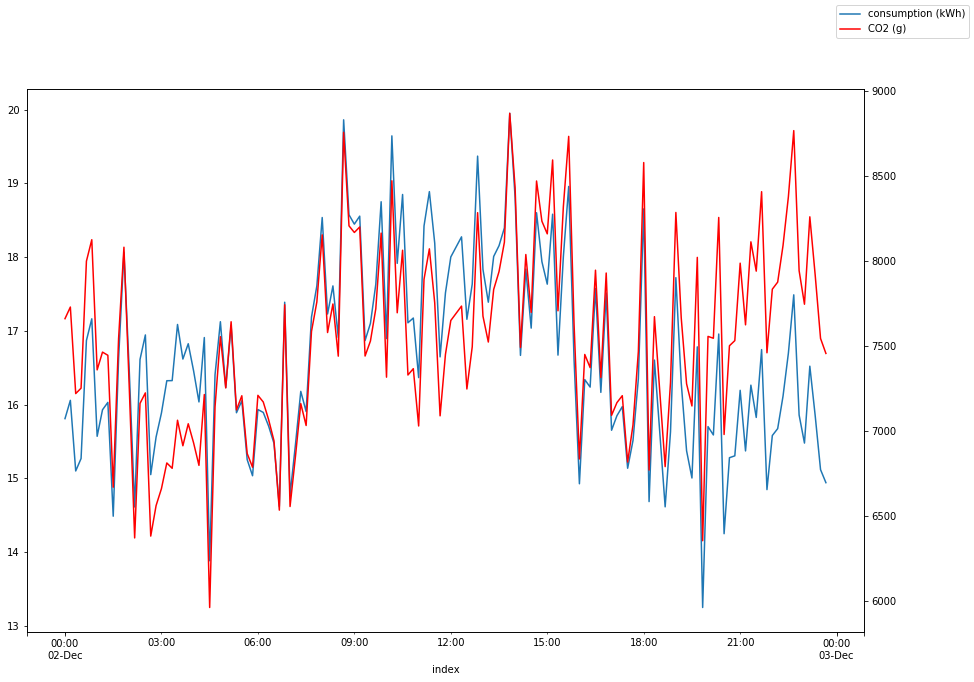

In [10]:
df_footprint2 = df_footprint.reset_index()
df_footprint2 = df_footprint2.rename(columns={"conso": "consumption (kWh)", "CO2": "CO2 (g)"})
ax = df_footprint2.plot(x='index', y="consumption (kWh)", legend=False)
ax2 = ax.twinx()
df_footprint2.plot(x='index', y="CO2 (g)", ax=ax2, legend=False, color="r", figsize=(15, 10))
ax.figure.legend()
plt.show()

matplotlib fill_between

In [11]:
import seaborn as sns

In [12]:
sns.set()

In [14]:
df_footprint['CO2_intensity'] = df_footprint['CO2']/ df_footprint["consumption (kWh)"]

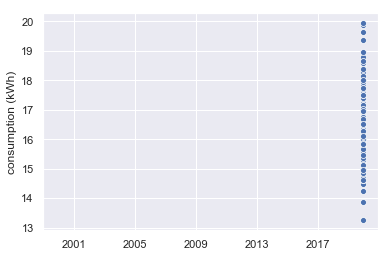

In [19]:
ax = sns.scatterplot(y="consumption (kWh)", x=df_footprint.index, data=df_footprint)